<a href="https://colab.research.google.com/github/tskmr/MIP/blob/main/Lec11_Bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
library(tidyverse)

t = c(
  6700, 6950, 7820, 8790, 9120, 9660, 9820, 11310, 11690, 11850,
  11880, 12140, 12200, 12870, 13150, 13330, 13470, 14040, 14300,
  17520, 17540, 17890, 18450, 18960, 18980, 19410, 20100, 20100,
  20150, 20320, 20900, 22700, 23490, 26510, 27410, 27490, 27890,
  28100)

dj = c(
  1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
  0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0)

rj = 1-dj
n = length(t)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


＃最尤推定

In [3]:
dsev = function(z){
  exp(z-exp(z))
}
psev = function(z){
  1-exp(-exp(z))
}
ft = function(x, par){
  mu = par[1]
  sigma = par[2]
  1/x/sigma * dsev((log(x) - mu)/sigma)
}
Ft = function(x, par){
  mu = par[1]
  sigma = par[2]
  psev((log(x) - mu)/sigma)
}
l_i = function(x, par, n_d, n_r){
  n_d * log(ft(x, par)) + n_r * log(1-Ft(x, par))
}
loglikelihood = function(x, n_d, n_r){
  function(par){
    sum(l_i(x, par, n_d, n_r))
  }
}
l = loglikelihood(t, dj, rj)
res = optim(c(30, 1), l, control= list(fnscale = -1), hessian = TRUE)
res

Hn = res$hessian # ヘッセ行列の推定値
hat.FI = -Hn # 観測フィッシャー情報行列の推定値
hat.aVar = solve(hat.FI) # 逆行列を求めて，プラグイン漸近分散を得る
hat.aVar

hat.mu = res$par[1] # muの最尤推定値
z = qnorm(0.975) # 標準正規分布の上側0.025%点
hat.mu - z * sqrt(hat.aVar[1,1])
hat.mu + z * sqrt(hat.aVar[1,1])

hat.sigma = res$par[2] # muの最尤推定値
z = qnorm(0.975) # 標準正規分布の上側0.025%点
hat.sigma - z * sqrt(hat.aVar[2,2])
hat.sigma + z * sqrt(hat.aVar[2,2])


Warning message in log(ft(x, par)):
“NaNs produced”


-109.86800,81.82946
81.82946,-247.60645


0.012073672,0.003990131
0.003990131,0.005357333


[1] 10.01443

[1] 10.44515

[1] 0.1730241

[1] 0.4599386

In [7]:
mu = hat.mu
sigma = hat.sigma
aVar = hat.aVar

In [9]:

t = seq(0, 50000, len=100)
hat.F = Ft(t, c(mu, sigma))
Jacobian = function(t, mu, sigma, h = 0.00001){
  j1 = (Ft(t, c(mu-h, sigma)) - Ft(t, c(mu+h, sigma)))/(2*h)
  j2 = (Ft(t, c(mu, sigma-h)) - Ft(t, c(mu, sigma+h)))/(2*h)
  matrix(c(j1, j2), ncol=2)
}
J = Jacobian(t, mu, sigma)
tJ = t(J)
var.F = sapply(1:length(t), function(i) J[i,]%*%aVar%*%tJ[,i])
var.F

[1] 0.000000e+00 7.818271e-11 4.183254e-09 4.111409e-08 2.027677e-07
  [6] 6.863358e-07 1.831949e-06 4.151209e-06 8.344080e-06 1.530293e-05
 [11] 2.610340e-05 4.198257e-05 6.430553e-05 9.452194e-05 1.341149e-04
 [16] 1.845444e-04 2.471892e-04 3.232888e-04 4.138907e-04 5.198054e-04
 [21] 6.415725e-04 7.794410e-04 9.333665e-04 1.103027e-03 1.287858e-03
 [26] 1.487106e-03 1.699903e-03 1.925352e-03 2.162631e-03 2.411095e-03
 [31] 2.670386e-03 2.940535e-03 3.222048e-03 3.515975e-03 3.823946e-03
 [36] 4.148172e-03 4.491412e-03 4.856885e-03 5.248142e-03 5.668895e-03
 [41] 6.122799e-03 6.613206e-03 7.142892e-03 7.713769e-03 8.326606e-03
 [46] 8.980765e-03 9.673970e-03 1.040213e-02 1.115924e-02 1.193733e-02
 [51] 1.272654e-02 1.351526e-02 1.429039e-02 1.503767e-02 1.574206e-02
 [56] 1.638829e-02 1.696132e-02 1.744688e-02 1.783205e-02 1.810575e-02
 [61] 1.825915e-02 1.828610e-02 1.818335e-02 1.795072e-02 1.759117e-02
 [66] 1.711067e-02 1.651798e-02 1.582440e-02 1.504328e-02 1.418959e-02
 [71] 1.327941e-02 1.232933e-02 1.135594e-02 1.037534e-02 9.402627e-03
 [76] 8.451566e-03 7.534235e-03 6.660831e-03 5.839531e-03 5.076456e-03
 [81] 4.375715e-03 3.739517e-03 3.168341e-03 2.661154e-03 2.215648e-03
 [86] 1.828500e-03 1.495625e-03 1.212423e-03 9.739983e-04 7.753611e-04
 [91] 6.115893e-04 4.779625e-04 3.700611e-04 2.838347e-04 2.156438e-04
 [96] 1.622758e-04 1.209433e-04 8.926603e-05 6.524275e-05 4.721547e-05

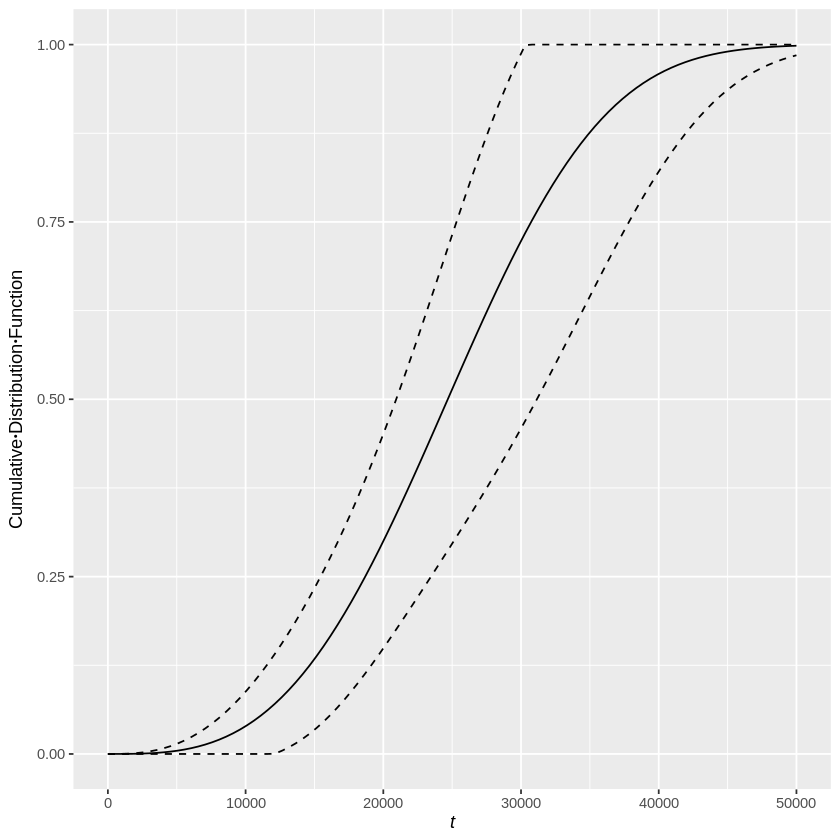

In [10]:
dFT = data.frame(
  t,
  mean=hat.F,
  upper=hat.F+qnorm(0.975)*sqrt(var.F),
  lower=hat.F-qnorm(0.975)*sqrt(var.F))
dFT = dFT %>% mutate(upper = ifelse(upper>1, 1, upper), lower=ifelse(lower<0, 0, lower))
plot = dFT %>%
  ggplot()+geom_line(aes(t, mean))+
  geom_line(aes(t, upper), linetype=2)+
  geom_line(aes(t, lower), linetype=2)+
  xlab(bquote(italic(t)))+ylab("Cumulative␣Distribution␣Function")
plot